In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import neighbors, datasets, feature_selection

In [2]:
"""
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines (spectral)
 	13)Proline   
"""
names = ['wine_type',
         'alcohol',
         'malic_acid',
         'ash',
         'alcalinity',
         'magnesium',
         'phenols',
         'flavanoids',
         'non_flavanoid_phenols',
         'proanthocyanins',
         'color_intensity',
         'hue',
         'spectral',
         'proline'
         ]
csv = pd.read_csv('../../DAT_20_NYC/Data/wine.data', header=None, names=names)
#csv.column_names = names
csv.head()

,wine_type,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,non_flavanoid_phenols,proanthocyanins,color_intensity,hue,spectral,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
csv.describe()

,wine_type,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,non_flavanoid_phenols,proanthocyanins,color_intensity,hue,spectral,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
print csv['wine_type'].value_counts()

2    71
1    59
3    48
dtype: int64


In [5]:
features = ['wine_type', 'alcohol', 'malic_acid','ash','hue','proline']
data = csv[features]
#pd.scatter_matrix(data, c=data.wine_type, figsize=(15,15), alpha=0.6, cmap='brg'); 

In [6]:
from sklearn import preprocessing
#scaling is needed here because not all the columns have the same scale, 
# so when calculating distances it could be way off.

scaled_values = preprocessing.scale(data)

X = pd.DataFrame(scaled_values, columns = features)
y = csv['wine_type']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=12)

In [8]:
scores = []
n_neighbors = range(1, 50)
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n, weights='distance')
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

y_model_train = clf.predict(X_test)

print scores
# mean of scores
print np.mean(scores)

[0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.98148148148148151, 0.98148148148148151, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 1.0, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.98148148148148151, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.94444444444444442, 0.94444444444444442, 0.94444444444444442, 0.96296296296296291, 0.94444444444444442, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.96296296296296291, 0.94444444444444442, 0.94444444444444442, 0.94444

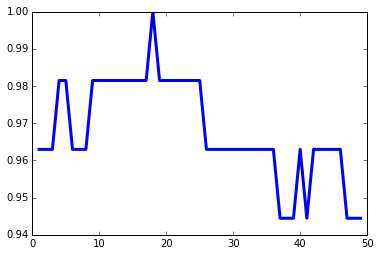

In [9]:
plt.plot(n_neighbors, scores, linewidth=3.0)
plt.xlabel="n_neighbors"
plt.ylabel="score"

In [10]:
# print out the confusion matrix, or not? 

from sklearn import metrics
y_pred = clf.predict(X_test)

conf_matrix=metrics.confusion_matrix(y_pred,y_test)
pd.DataFrame(conf_matrix, columns=['Pred1', 'Pred2', 'Pred3'], index=['Actual1', 'Actual2', 'Actual3'])
print np.array(X.columns)

['wine_type' 'alcohol' 'malic_acid' 'ash' 'hue' 'proline']


In [11]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import StratifiedKFold


# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 3 3], n_folds=2, shuffle=False, random_state=None),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
   estimator_params={}, loss_func=None, scoring='accuracy', step=1,
   verbose=0)

In [12]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel("Cross validation score nb of correct classifications")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


TypeError: 'str' object is not callable